In [ ]:
!pip install yfinance matplotlib seaborn scikit-learn tensorflow


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - loss: 0.0439 - val_loss: 0.0014
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0014 - val_loss: 4.2126e-04
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 9.3897e-04 - val_loss: 1.7239e-04
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0010 - val_loss: 7.5657e-04
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0011 - val_loss: 8.8643e-05
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 9.7989e-04 - val_loss: 1.3880e-04
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 8.6873e-04 - val_loss: 2.4957e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Root Mean Squared Error: 23.34


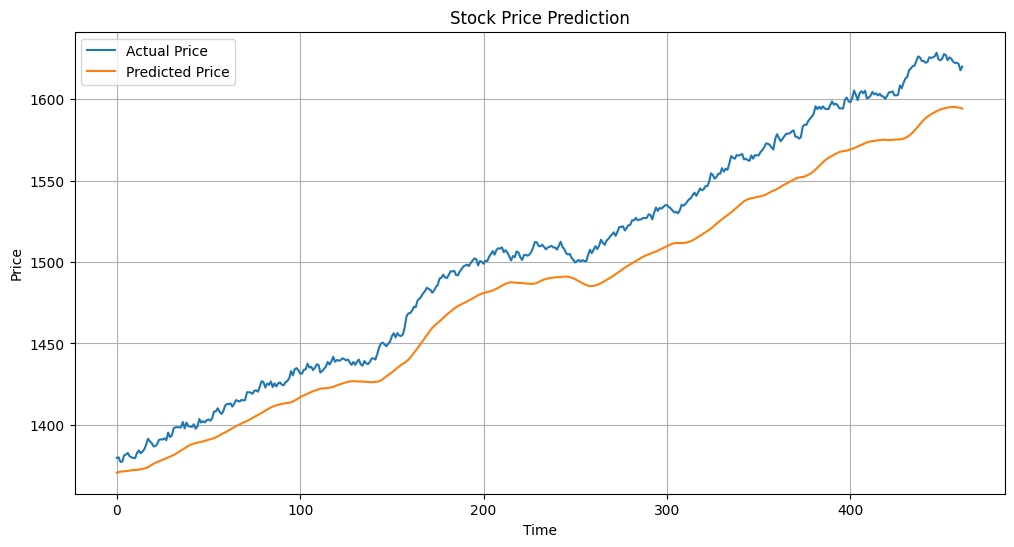

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import math
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('AAPL_sample_stock_data.csv', index_col='Date', parse_dates=True)
data = data[['Close']]
data.dropna(inplace=True)


if not data.empty:
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
else:
    raise ValueError("Dataset is empty. Please check your CSV file.")


training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Root Mean Squared Error: {rmse:.2f}")


plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Dataset Description

In [3]:

import pandas as pd

df = pd.read_csv("/content/AAPL_sample_stock_data.csv")
print(df.head())


         Date       Close
0  2015-01-01  151.493428
1  2015-01-02  151.716900
2  2015-01-05  153.512277
3  2015-01-06  157.058336
4  2015-01-07  157.090030


Data Preprocessing


In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("AAPL_sample_stock_data.csv")

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[['Close']])


comparison_df = pd.DataFrame({
    'Original Close': df['Close'],
    'Scaled Close': scaled_data.flatten()
})


print(comparison_df.head())


   Original Close  Scaled Close
0      151.493428      0.000000
1      151.716900      0.000151
2      153.512277      0.001367
3      157.058336      0.003767
4      157.090030      0.003789


Exploratory Data Analysis (EDA)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("AAPL_sample_stock_data.csv")


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


Histogram


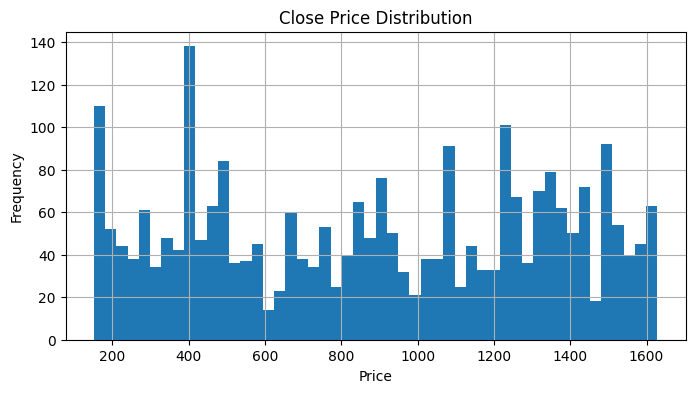

In [13]:
plt.figure(figsize=(8, 4))
df['Close'].hist(bins=50)
plt.title('Close Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Boxplot

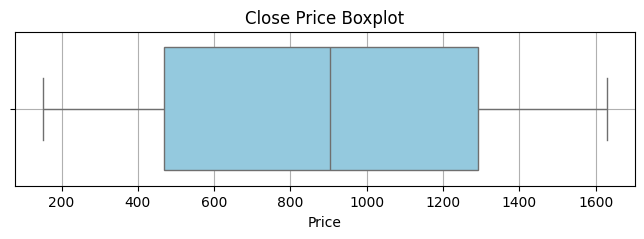

In [14]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Close'], color='skyblue')
plt.title('Close Price Boxplot')
plt.xlabel('Price')
plt.grid(True)
plt.show()

Line Plot (Trend Analysis):

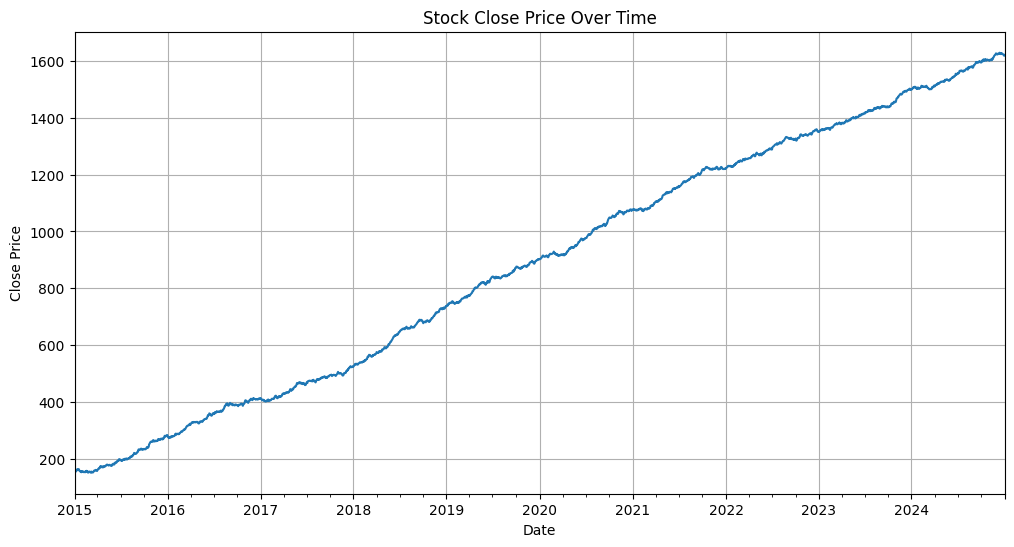

In [15]:
plt.figure(figsize=(12, 6))
df['Close'].plot()
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

Heatmap

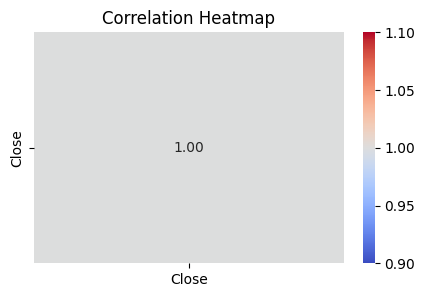

In [16]:
corr = df.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

8.	FeatureEngineering

In [19]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA14'] = df['Close'].rolling(window=14).mean()
df['Daily_Return'] = df['Close'].pct_change()
df['Lag_1'] = df['Close'].shift(1)



In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])


model training


In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv('AAPL_sample_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use only 'Close' for univariate LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])


In [30]:
import numpy as np

sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)


X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [31]:
train_size = int(len(X) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=20, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0455
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 5.4183e-05
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 2.3049e-05
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.6339e-05
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.5134e-05
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 1.5153e-05
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 1.6383e-05
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 1.4442e-05
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.3702e-05
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.4501e-05
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.4865e-05
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 1.4476e-05
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1.4018e-05
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.3804e-05
Epoch 15/20
64/64 ━

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


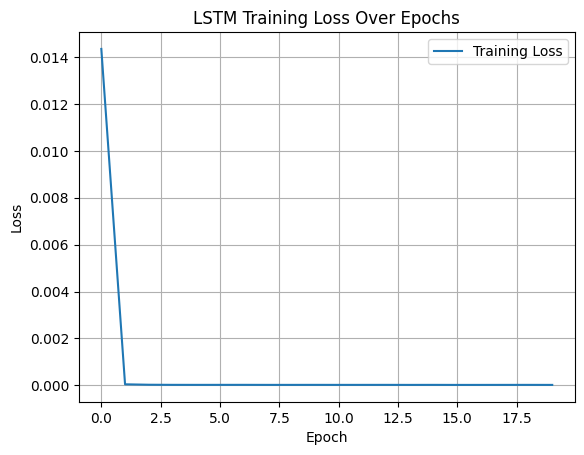

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.title('LSTM Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


10.	Model Evaluation

In [39]:
predicted = model.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_test and predicted are scaled values; inverse transform if needed
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")


RMSE: 21.034796707245153
MAE: 18.60320092815802
R2 Score: 0.9307030537607603


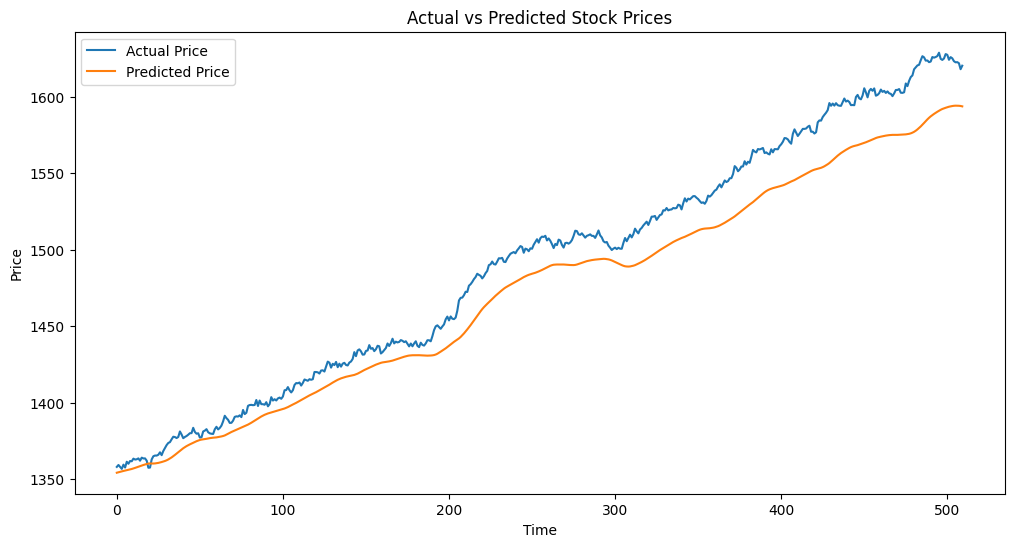

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


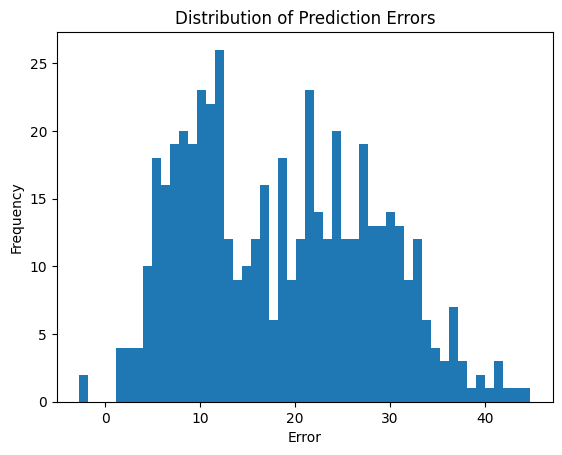

In [41]:
errors = actual_prices - predicted_prices
plt.hist(errors, bins=50)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
